In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install --upgrade pip

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

/tmp/ipykernel_13/3635408121.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')  

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [5]:
df.duplicated().sum()

2310

In [6]:

df.drop_duplicates(inplace=True)

In [7]:
print(df.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


ModuleNotFoundError: No module named 'seaborn'

In [9]:
# Convert the column to numeric, coercing invalid parsing to NaN
df['average_rain_fall_mm_per_year_numeric'] = pd.to_numeric(df['average_rain_fall_mm_per_year'], errors='coerce')

# Identify the indices of rows where NaN values occur
to_drop = df[df['average_rain_fall_mm_per_year_numeric'].isna()].index

# Drop the additional column created for numeric conversion if needed
# df.drop(columns=['average_rain_fall_mm_per_year_numeric'], inplace=True)


In [10]:
df = df.drop(to_drop)

In [11]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,average_rain_fall_mm_per_year_numeric
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,1485.0
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,1485.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,1485.0
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,1485.0
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,1485.0
...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,657.0
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,657.0
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,657.0
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,657.0


In [12]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [13]:
len(df['Area'].unique())

101

In [14]:
country = df['Area'].unique()
yield_per_country = [df[df['Area'] == state]['hg/ha_yield'].sum() for state in country]


In [15]:
df['hg/ha_yield'].sum()

1996196943

In [16]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [17]:
crops = df['Item'].unique()
yield_per_crop = [df[df['Item'] == crop]['hg/ha_yield'].sum() for crop in crops]


In [18]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

# Instantiate the transformers
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

# Create the ColumnTransformer
preprocessor = make_column_transformer(
    (scale, [0, 1, 2, 3]),  # Standard scale the numerical features
    (ohe, [4, 5]),           # One-hot encode the categorical features
    remainder='passthrough' # Passthrough the remaining features
)


In [22]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)


In [23]:
X_test_dummy.shape

(5187, 113)

In [24]:
preprocessor.get_feature_names_out(col[:-1])

array(['standardscaler__Year',
       'standardscaler__average_rain_fall_mm_per_year',
       'standardscaler__pesticides_tonnes', 'standardscaler__avg_temp',
       'onehotencoder__Area_Algeria', 'onehotencoder__Area_Angola',
       'onehotencoder__Area_Argentina', 'onehotencoder__Area_Armenia',
       'onehotencoder__Area_Australia', 'onehotencoder__Area_Austria',
       'onehotencoder__Area_Azerbaijan', 'onehotencoder__Area_Bahamas',
       'onehotencoder__Area_Bahrain', 'onehotencoder__Area_Bangladesh',
       'onehotencoder__Area_Belarus', 'onehotencoder__Area_Belgium',
       'onehotencoder__Area_Botswana', 'onehotencoder__Area_Brazil',
       'onehotencoder__Area_Bulgaria', 'onehotencoder__Area_Burkina Faso',
       'onehotencoder__Area_Burundi', 'onehotencoder__Area_Cameroon',
       'onehotencoder__Area_Canada',
       'onehotencoder__Area_Central African Republic',
       'onehotencoder__Area_Chile', 'onehotencoder__Area_Colombia',
       'onehotencoder__Area_Croatia', 'oneho

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor()
}

# Define evaluation metrics
evaluation_metrics = {
    'Mean Absolute Error': mean_absolute_error,
    'R^2 Score': r2_score
}

# Split data and fit models
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    
    # Print model name
    print(f"\n{name}:")
    
    # Calculate and print evaluation metrics
    for metric_name, metric_func in evaluation_metrics.items():
        score = metric_func(y_test, y_pred)
        print(f"{metric_name}: {score:.4f}")



Linear Regression:
Mean Absolute Error: 29907.5332
R^2 Score: 0.7473

KNN:
Mean Absolute Error: 4611.6527
R^2 Score: 0.9850


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.02734, tolerance: 14848622817.505232
  model = cd_fast.sparse_enet_coordinate_descent(



Lasso:
Mean Absolute Error: 29893.9976
R^2 Score: 0.7473

Ridge:
Mean Absolute Error: 29864.8834
R^2 Score: 0.7473

Decision Tree:
Mean Absolute Error: 4035.0170
R^2 Score: 0.9786


In [26]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
dtr = KNeighborsRegressor()

# Train the model
dtr.fit(X_train_dummy, y_train)

# Make predictions
y_pred = dtr.predict(X_test_dummy)

# Print the predictions
print(y_pred)


[ 36704.4  26605.2  21543.2 ...  23360.4  35078.6 157096.8]


In [27]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'

# Call the prediction function
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

# Print the result
print(result)


[30938.2]


/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [28]:
result

array([30938.2])

In [29]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [30]:
import sklearn
print(sklearn.__version__)

1.4.0


In [31]:
# prompt: /usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names   warnings.warn( /usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names   warnings.warn( -----------------------------------------------

!pip install pickle5
import pickle5 as pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))
print(sklearn.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=276412 sha256=76fbc9121a53c983ea02714ee1364bfd761a33718fcbcb2cc2cbdba40abef732
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
1.4.0


In [32]:
# prompt: perform shap

!pip install shap
import shap

#explainer = shap.KernelExplainer(dtr.predict, X_train_dummy)
#shap_values = explainer.shap_values(X_test_dummy)

#shap.summary_plot(shap_values, X_test_dummy, feature_names=preprocessor.get_feature_names_out(col[:-1]))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


100%|██████████| 100/100 [17:14<00:00, 10.34s/it]


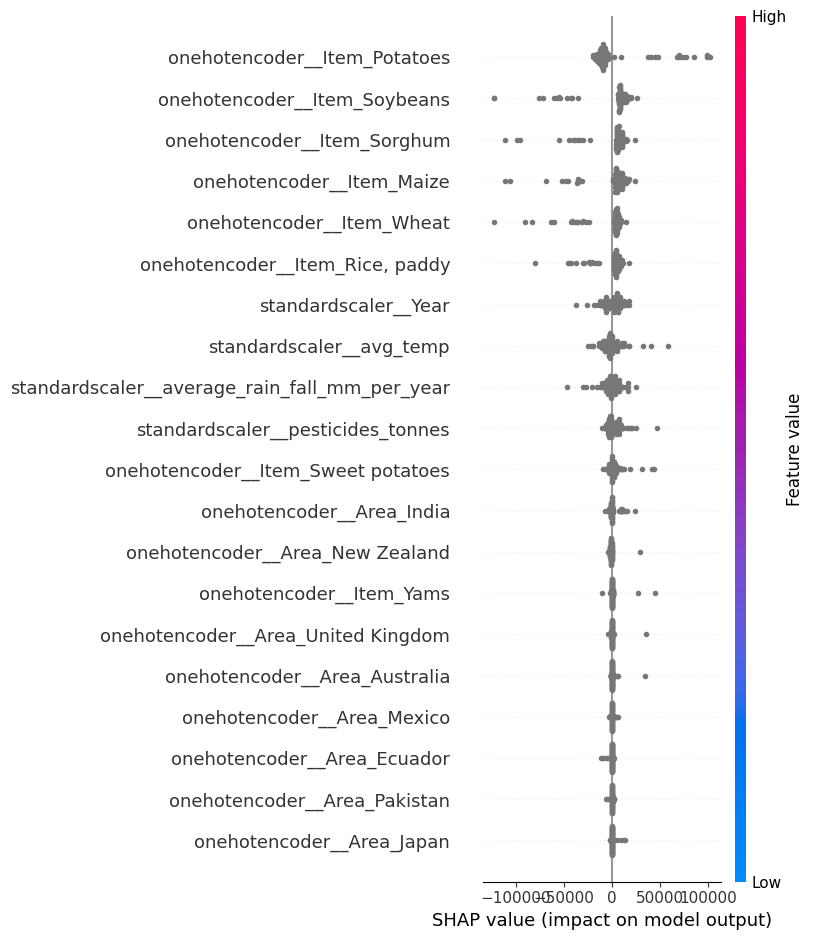

In [33]:
import numpy as np
import shap
import warnings

warnings.filterwarnings("ignore")

# Define the number of samples you want to keep
sample_size = 100 # Adjust this as needed

# Randomly select a subset of samples from X_test_dummy
random_indices = np.random.choice(X_test_dummy.shape[0], sample_size, replace=False)
X_test_dummy_subset = X_test_dummy[random_indices]

# Summarize the background data using shap.sample
background_data_summary = shap.sample(X_train_dummy, 100)  # Adjust the sample size as needed

# Initialize the KernelExplainer with the summarized background data
explainer = shap.KernelExplainer(dtr.predict, background_data_summary)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_dummy_subset)

# Plot the summary plot
shap.summary_plot(shap_values, X_test_dummy_subset, feature_names=preprocessor.get_feature_names_out(col[:-1]))


In [ ]:

import warnings
import shap

warnings.filterwarnings("ignore")

# Summarize the background data using shap.sample
background_data_summary = shap.sample(X_train_dummy, 100)  # Adjust the sample size as needed

# Initialize the KernelExplainer with the summarized background data
explainer = shap.KernelExplainer(dtr.predict, background_data_summary)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_dummy)

# Plot the summary plot
shap.summary_plot(shap_values, X_test_dummy, feature_names=preprocessor.get_feature_names_out(col[:-1]))


  0%|          | 0/5187 [00:00<?, ?it/s]

In [ ]:
import warnings
import shap

warnings.filterwarnings("ignore")

# Sample a subset of the background data for summarization
sample_size = 100  # Adjust the sample size as needed
background_data_summary = shap.sample(X_train_dummy, sample_size)

# Initialize the KernelExplainer with the summarized background data
explainer = shap.KernelExplainer(dtr.predict, background_data_summary)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_dummy)

# Plot the summary plot
shap.summary_plot(shap_values, X_test_dummy, feature_names=preprocessor.get_feature_names_out(col[:-1]))
